# BioSTEAM User Guide Tutorial - Beginner's Guide
this runs in Ubuntu 22.04.2 LTS on WSL2, Python 3.10.12\
install BioSTEAM with 'pip install biosteam'

## 4. Unit operation results

In the following example, BioSTEAM’s distillation column is used to highlight key details here on where do unit operations store results:

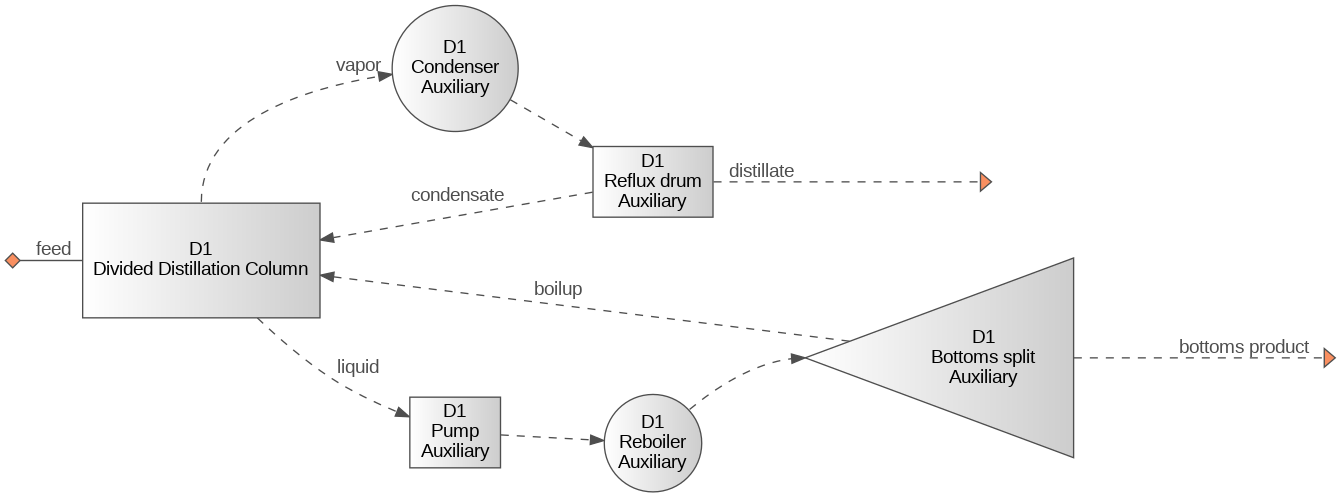

BinaryDistillation: D1
ins...
[0] feed  
    phase: 'l', T: 354.28 K, P: 101325 Pa
    flow (kmol/hr): Water    1.08e+03
                    Ethanol  586
outs...
[0] distillate  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] bottoms_product  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [2]:
from biosteam import Stream, settings
import biosteam as bst
bst.nbtutorial()

# First set the property package
settings.set_thermo(['Water', 'Ethanol'])

# Create the feed at the bubble point
feed = Stream('feed', Water=1.08e+03, Ethanol=586)
bp = feed.bubble_point_at_P()
feed.T = bp.T # Feed at bubble point temperature

# Create a distillation column and simulate
# Use BinaryDistillation for 2-components
# For 3+ components, use ShortcutColumn
D1 = bst.BinaryDistillation(
    'D1', ins=feed,
    outs=('distillate', 'bottoms_product'),
    LHK=('Ethanol', 'Water'), # Light and heavy keys
    # is this the starting/objective concentration of distillate?
    y_top=0.79, # Light key composition at the distillate
    # is this the starting/objective concentration of distillate in the bottomw product?
    x_bot=0.001, # Light key composition at the bottoms product
    k=1.25, # Ratio of actual reflux over minimum reflux
    is_divided=True, # Whether the rectifying and stripping sections are divided
)
D1.diagram(format='png')
D1.show()

All unit operations have the design_results, purchase_costs, heat_utilities, and power_utility attributes. The heat_utilities attribute is a list of HeatUtility objects and the power_utility attribute is a PowerUtility object. Unit operations may also have attributes and components specific to that unit operation. Let’s look at the condenser within the diagram:

In [3]:
D1.condenser.diagram()
D1.condenser.show()

HXutility: condenser
ins...
[0] vapor  from  BinaryDistillation-D1
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow: 0
outs...
[0] to  RefluxDrum-reflux_drum
    phases: ('g', 'l'), T: 298.15 K, P: 101325 Pa
     flow: 0


After simulation, the unit operation along with its components will calculate all design results, purchase costs, and utilities:




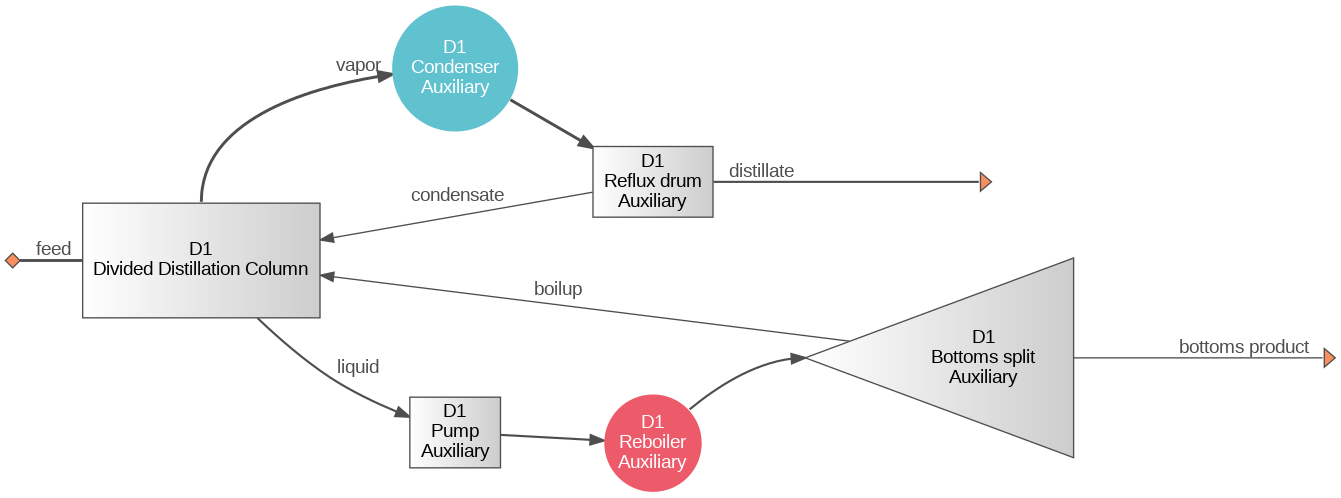

BinaryDistillation: D1
ins...
[0] feed  
    phase: 'l', T: 81.125 degC, P: 1 atm
    composition (%): Water    64.8
                     Ethanol  35.2
                     -------  1.67e+03 kmol/hr
outs...
[0] distillate  
    phase: 'g', T: 78.484 degC, P: 1 atm
    composition (%): Water    21
                     Ethanol  79
                     -------  741 kmol/hr
[1] bottoms_product  
    phase: 'l', T: 99.64 degC, P: 1 atm
    composition (%): Water    99.9
                     Ethanol  0.1
                     -------  925 kmol/hr


In [4]:
D1.simulate()
D1.diagram(format='png')
D1.show(T='degC', P='atm', composition=True)


In [ ]:
design results:

purchase costs
D1.purchase_costs

utilities:
D1.heat_utilities
D1.power_utility
